<a href="https://colab.research.google.com/github/CansecoSergio/python-data-science/blob/main/FR_M12_SergioCanseco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto módulo 12 Sergio Canseco**

## **Librerías**

In [211]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

## **Exploración de la información**

In [212]:
df_red = pd.read_csv('/content/email-enron-only.mtx', header=None, names=['Emisor', 'Receptor'], sep=" ")
df_red.head()

,Emisor,Receptor
0,17,1
1,72,1
2,3,2
3,19,2
4,20,2


In [213]:
df_red.tail()

,Emisor,Receptor
618,136,132
619,141,133
620,135,134
621,140,134
622,143,142


In [214]:
#Revisión de NAs
pd.isna(df_red).sum()

,0
Emisor,0
Receptor,0


In [215]:
#Revisión de nulos
pd.isnull(df_red).sum()

,0
Emisor,0
Receptor,0


In [216]:
df_red['tuplas'] = list(zip(df_red.Emisor, df_red.Receptor))
df_red

,Emisor,Receptor,tuplas
0,17,1,"(17, 1)"
1,72,1,"(72, 1)"
2,3,2,"(3, 2)"
3,19,2,"(19, 2)"
4,20,2,"(20, 2)"
...,...,...,...
618,136,132,"(136, 132)"
619,141,133,"(141, 133)"
620,135,134,"(135, 134)"
621,140,134,"(140, 134)"


## **Red No Dirigida**

{17: Text(0.10833619740816647, 0.11875517270929896, '17'),
 1: Text(-0.11153948469036129, -0.004163439882833837, '1'),
 72: Text(-0.07532526537861958, -0.1640701972705476, '72'),
 3: Text(-0.05109775804854081, -0.4363612102346197, '3'),
 2: Text(-0.029327241121856956, -0.3755395555270195, '2'),
 19: Text(-0.06764630359341389, -0.3885517302973386, '19'),
 20: Text(-0.04662991724958971, -0.4071388180950447, '20'),
 27: Text(-0.11017797635236762, -0.35970083591223045, '27'),
 29: Text(-0.055784783625169775, -0.4619400657562565, '29'),
 31: Text(-0.08931399341610743, -0.3046088522959046, '31'),
 48: Text(0.03901453998742995, -0.12362101102576466, '48'),
 65: Text(0.033906787373522006, -0.3680387066721584, '65'),
 67: Text(0.005964682570645305, -0.34405854878981845, '67'),
 69: Text(-0.07791164848039858, -0.36533784480743703, '69'),
 71: Text(-0.09042123216902874, -0.4717989841174554, '71'),
 132: Text(-0.02411229179362729, -0.2796345069921002, '132'),
 136: Text(-0.05977261140281461, -0.36

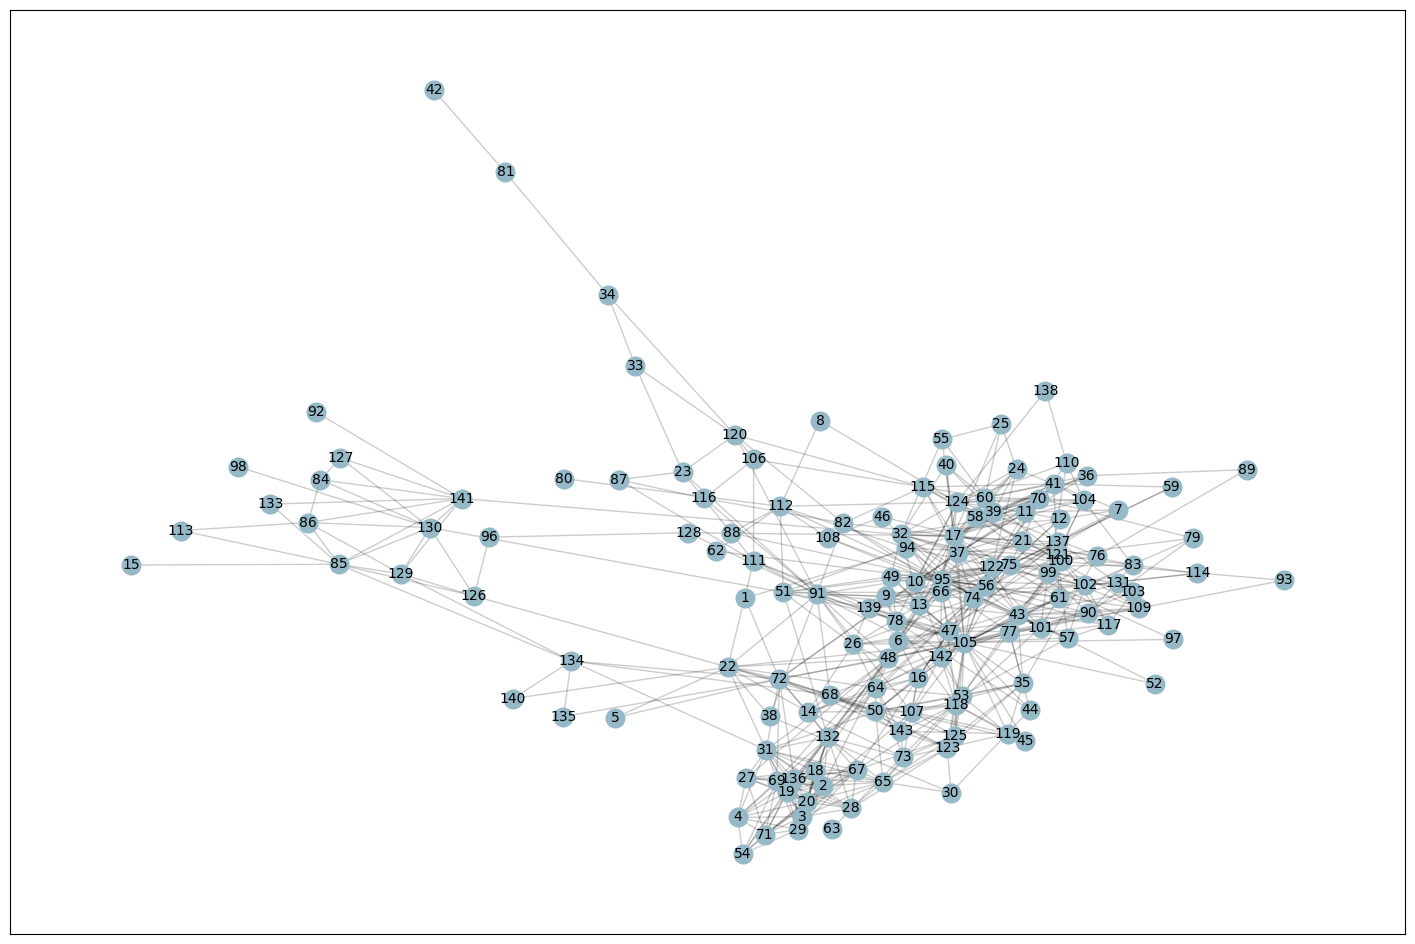

In [217]:
# Read edge list
G = nx.from_pandas_edgelist(df_red, 'Emisor','Receptor')
# Draw network
plt.figure(figsize=(18,12))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=180, node_color= "#95B9C7")
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

### ¿Cuál es el nodo con el grado máximo?

In [218]:
#Obtiene el nodo de grado maximo
max(dict(G.degree()).items(), key=lambda x: x[1])

(105, 42)

In [219]:
#Grados de los nodos ordenados por degree
sorted(dict(G.degree()).items(), key=lambda x: x[1], reverse=True)

[(105, 42),
 (17, 30),
 (95, 23),
 (48, 20),
 (132, 19),
 (43, 19),
 (31, 18),
 (74, 18),
 (91, 18),
 (72, 17),
 (20, 17),
 (136, 17),
 (124, 17),
 (32, 17),
 (19, 16),
 (67, 16),
 (69, 16),
 (47, 16),
 (50, 16),
 (65, 15),
 (75, 15),
 (118, 15),
 (22, 14),
 (56, 14),
 (37, 14),
 (53, 14),
 (122, 14),
 (60, 14),
 (2, 13),
 (64, 13),
 (123, 13),
 (3, 12),
 (9, 12),
 (101, 12),
 (121, 12),
 (77, 12),
 (29, 11),
 (71, 11),
 (4, 11),
 (13, 11),
 (26, 11),
 (66, 11),
 (51, 11),
 (68, 11),
 (100, 11),
 (142, 11),
 (27, 10),
 (28, 10),
 (16, 10),
 (49, 10),
 (137, 10),
 (115, 10),
 (18, 10),
 (35, 10),
 (125, 10),
 (6, 9),
 (112, 9),
 (139, 9),
 (14, 9),
 (85, 9),
 (107, 9),
 (39, 9),
 (58, 9),
 (104, 9),
 (141, 9),
 (90, 9),
 (99, 9),
 (109, 9),
 (143, 9),
 (130, 9),
 (102, 9),
 (11, 8),
 (24, 8),
 (10, 8),
 (73, 8),
 (41, 8),
 (119, 8),
 (54, 7),
 (78, 7),
 (70, 7),
 (82, 7),
 (111, 7),
 (120, 7),
 (134, 7),
 (117, 7),
 (57, 7),
 (12, 6),
 (21, 6),
 (36, 6),
 (61, 6),
 (76, 6),
 (86, 6),
 (

Nodo 105 con grado 42

### ¿Cuál es el nodo con el grado mínimo?

In [220]:
#Obtiene el nodo de grado minimo
min(dict(G.degree()).items(), key=lambda x: x[1])

(15, 1)

Nodo 15 con grado 1

### ¿Cuál es el diámetro de la red?

In [221]:
nx.diameter(G)

8

El diámetro de la red es: 8

### ¿Cuál es la distancia promedio más corta?

Distancias promedio más cortas del nodo 42 al 54

In [222]:
list(nx.all_shortest_paths(G, 42, 54))

[[42, 81, 34, 120, 91, 48, 19, 54],
 [42, 81, 34, 120, 91, 48, 69, 54],
 [42, 81, 34, 120, 91, 48, 136, 54],
 [42, 81, 34, 120, 91, 107, 20, 54]]

Distancias promedio más cortas

In [223]:
#Obtiene todas las distancias promedio más cortas
def every_shortest_path(G):
    return {(src, tgt): a_shortest_path(G, src, tgt) for src in G for tgt in G}

In [224]:
#Funcion que determina las conexiones entre nodos con menor distancia
def a_shortest_path(G, source, target, weight="distance"):
    return nx.single_source_dijkstra(G, source, target, weight=weight)

In [225]:
print(every_shortest_path(G))

{(17, 17): (0, [17]), (17, 1): (1, [17, 1]), (17, 72): (2, [17, 1, 72]), (17, 3): (3, [17, 48, 2, 3]), (17, 2): (2, [17, 48, 2]), (17, 19): (2, [17, 48, 19]), (17, 20): (3, [17, 48, 2, 20]), (17, 27): (2, [17, 48, 27]), (17, 29): (3, [17, 48, 2, 29]), (17, 31): (2, [17, 48, 31]), (17, 48): (1, [17, 48]), (17, 65): (3, [17, 48, 2, 65]), (17, 67): (3, [17, 48, 2, 67]), (17, 69): (2, [17, 48, 69]), (17, 71): (3, [17, 48, 2, 71]), (17, 132): (2, [17, 48, 132]), (17, 136): (2, [17, 48, 136]), (17, 4): (3, [17, 48, 19, 4]), (17, 28): (3, [17, 48, 19, 28]), (17, 54): (3, [17, 48, 19, 54]), (17, 22): (2, [17, 48, 22]), (17, 5): (3, [17, 1, 72, 5]), (17, 9): (3, [17, 11, 74, 9]), (17, 6): (2, [17, 105, 6]), (17, 13): (2, [17, 32, 13]), (17, 16): (2, [17, 105, 16]), (17, 26): (2, [17, 105, 26]), (17, 47): (2, [17, 105, 47]), (17, 49): (2, [17, 32, 49]), (17, 64): (2, [17, 105, 64]), (17, 66): (2, [17, 32, 66]), (17, 105): (1, [17, 105]), (17, 11): (1, [17, 11]), (17, 7): (2, [17, 11, 7]), (17, 1

El promedio del camino más corto

In [226]:
promedio_caminos = nx.average_shortest_path_length(G)

print(f"Promedio de los caminos mas cortos de la red: {promedio_caminos}")

Promedio de los caminos mas cortos de la red: 2.967004826159756


### ¿Es una red bipartita?

In [227]:
from networkx.algorithms import bipartite
bipartite.is_bipartite(G)

False

La red no es bipartita

## **Robustez**

In [228]:
# simular falla
def random_node(g):
  return [np.random.choice(g.nodes())]

In [229]:
# simular ataque
def get_sorted_nodes(g, score, reverse=True):
    nodes = score(g)
    if isinstance(nodes, dict):
        nodes = [(k, v) for k, v in nodes.items()]
    srt = sorted(nodes, key = lambda k: k[1], reverse = reverse)
    return [x[0] for x in srt]

In [230]:
def dismantle(g, function, **args):
    total_nodes = g.number_of_nodes()
    removed_nodes = []
    components = []
    while len(g.nodes()) > 1:
        n = function(g, **args)[0]
        print(n)
        g.remove_node(n)
        removed_nodes.append((len(removed_nodes)+1)/total_nodes)
        comps = list(nx.connected_components(g))
        g_size = 0
        if len(comps)>0:
            g_size  = max([len(c)for c in comps])/total_nodes
        components.append(g_size)
    return removed_nodes, components

In [231]:
def plot_dismantle(x, y):
    plt.plot(x, y)
    plt.xlabel("Removed Nodes")
    plt.ylabel("Giant Component size")
    plt.show()

61
120
69
134
97
3
125
99
83
80
43
89
131
17
114
55
90
4
67
110
104
7
126
59
27
53
32
135
113
38
117
36
129
42
109
138
87
23
18
49
29
39
57
11
81
14
62
76
68
45
95
133
37
6
121
30
124
78
28
79
115
85
25
102
5
73
130
82
86
20
48
101
64
141
51
35
65
54
21
93
13
8
26
74
137
107
70
96
128
2
116
72
33
40
46
1
52
100
71
44
98
31
77
127
91
12
10
88
22
94
136
15
105
60
106
56
122
108
142
140
41
50
19
103
118
66
24
63
119
132
139
111
34
123
47
16
75
143
58
92
9
112


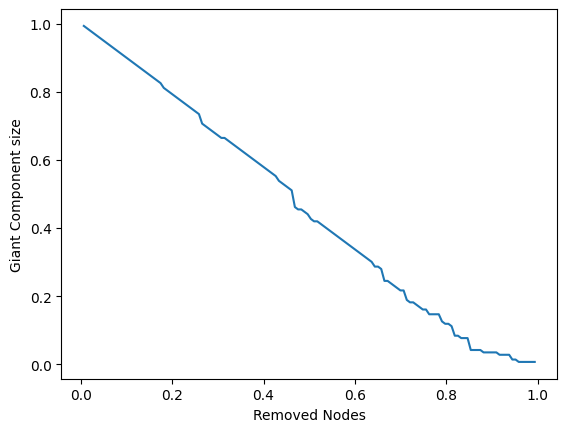

In [232]:
#Removiendo nodos aleatorios
red_ante_fallas = G.copy()
removed_nodes, components = dismantle(red_ante_fallas, random_node)
plot_dismantle(removed_nodes, components)

105
48
17
91
95
32
51
72
22
134
74
124
47
122
53
118
35
142
44
56
75
6
26
115
77
137
121
100
102
104
90
111
65
123
132
31
20
67
70
37
24
85
130
43
141
60
112
120
23
39
103
86
99
68
119
19
69
136
3
9
73
50
16
29
27
66
116
71
36
101
126
34
64
21
1
2
4
28
54
5
13
49
11
7
12
8
78
139
10
14
15
107
25
40
41
55
58
61
76
82
128
18
83
38
140
33
87
30
81
125
89
59
42
52
109
117
45
46
108
131
143
94
57
63
62
79
135
114
97
80
84
127
113
129
133
88
92
93
96
98
110
106


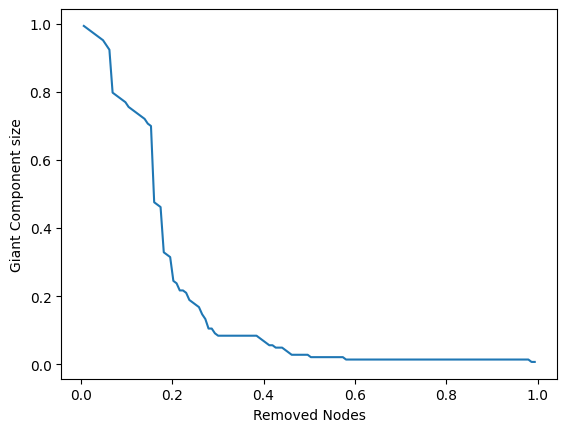

In [233]:
#Removiendo nodos con la centralidad de intermediación
red_ante_ataques = G.copy()
removed_nodes, components = dismantle(red_ante_ataques,get_sorted_nodes, score=nx.betweenness_centrality)
plot_dismantle(removed_nodes, components)

In [234]:
import networkx.algorithms.connectivity as nxcon

**¿Cuántos y cuales nodos hay que remover para que la red sea disconexa?**

In [235]:
#Cantidad de nodos que hay que remover para separar la red
minimos_cortes = nxcon.minimum_st_node_cut(G, s=105, t=48)
minimos_cortes

{17, 20, 22, 28, 31, 39, 58, 60, 65, 67, 72, 74, 90, 91, 99, 101, 121, 132}

Por ejemplo para desconectar la red de los nodos 105 y 48 que son los de mayor centralidad de intermediación se tendrían que eliminar los 18 nodos mencionados.

**¿Cuántos y cuales arcos hay que remover para que la red sea disconexa?**

In [236]:
#Cantidad de arcos que hay que remover para que la red
minimos_arcos = nxcon.minimum_st_edge_cut(G, s=105, t=48)
minimos_arcos

{(2, 48),
 (17, 48),
 (18, 48),
 (19, 48),
 (22, 48),
 (27, 48),
 (31, 48),
 (39, 48),
 (58, 48),
 (60, 48),
 (69, 48),
 (72, 48),
 (74, 48),
 (90, 48),
 (91, 48),
 (99, 48),
 (101, 48),
 (121, 48),
 (132, 48),
 (136, 48)}

Por ejemplo para desconectar la red de los nodos 105 y 48 que son los de mayor centralidad de intermediación se tendrían que eliminar los 20 arcos mencionados.

In [237]:
# Read edge list
G_cortes = G.copy()

In [238]:
color_dept_cortes = [ ]
for node in G_cortes.nodes(data=True):
  #Si el nodo es igual a un nodo dentro del arreglo repetidos
  if node[0] in minimos_cortes:
    color_dept_cortes.append('red')
  else :
    color_dept_cortes.append('#566D7E')

#Total de colores
len(color_dept_cortes)

143

In [239]:
color_dept_edges = [ ]
for edge in G_cortes.edges(data=True):
  #Si el arco es igual a alguno de los arcos en minimos_arcos
  t = (edge[0], edge[1])
  if t in minimos_arcos:
    color_dept_edges.append('red')
  else :
    color_dept_edges.append('#566D7E')

#Total de colores
len(color_dept_edges)

623

{17: Text(0.06745026754029743, 0.10434138946572882, '17'),
 1: Text(-0.03692379424155352, -0.08629933752943245, '1'),
 72: Text(0.013698146450658378, -0.1832894566755364, '72'),
 3: Text(0.05202100785687912, -0.3565727643240836, '3'),
 2: Text(0.029152411264357476, -0.2950091525004759, '2'),
 19: Text(0.010080202376045656, -0.32310502424808485, '19'),
 20: Text(0.05925384735337843, -0.32661144039387274, '20'),
 27: Text(-0.01729962089683985, -0.31391070898084933, '27'),
 29: Text(-0.012907868167980278, -0.36532590438047324, '29'),
 31: Text(0.0203080990619832, -0.26743528883993156, '31'),
 48: Text(0.04627902374783037, -0.0962548659612948, '48'),
 65: Text(0.10834479223476484, -0.25981683464978067, '65'),
 67: Text(0.04009039163153559, -0.25164669399000916, '67'),
 69: Text(0.026977688654280765, -0.31887273178534964, '69'),
 71: Text(0.02952328865137242, -0.39751312644938447, '71'),
 132: Text(-0.011581832510416343, -0.21908723439815286, '132'),
 136: Text(0.0426713974334516, -0.306706

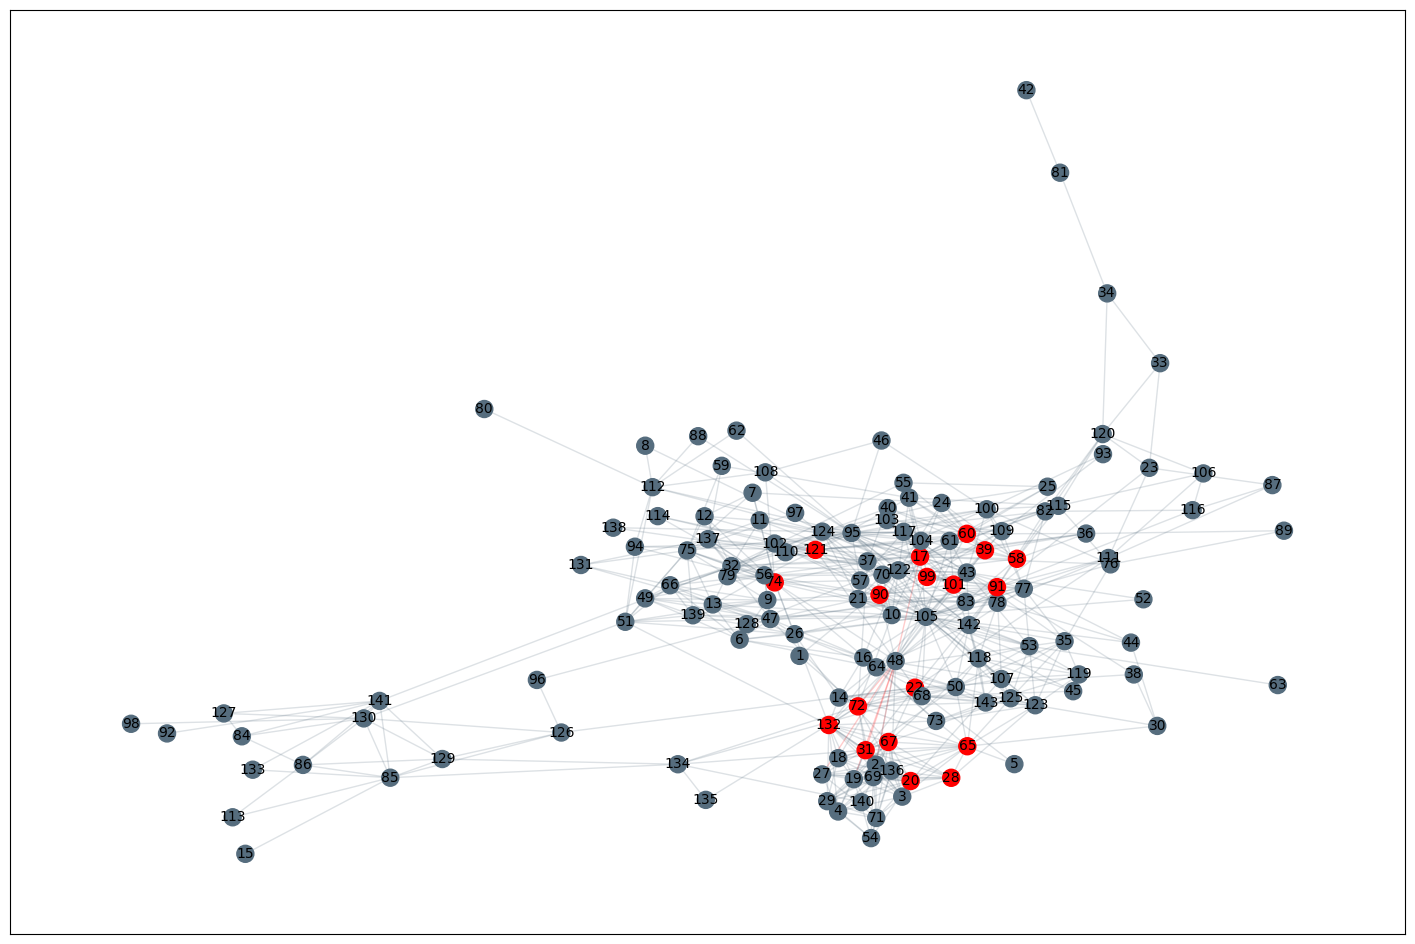

In [240]:
plt.figure(figsize=(18,12))
pos = nx.spring_layout(G_cortes)
nx.draw_networkx_nodes(G_cortes, pos, node_size=150, node_color=color_dept_cortes)
nx.draw_networkx_edges(G_cortes, pos, alpha=0.2, edge_color=color_dept_edges)
nx.draw_networkx_labels(G_cortes, pos, font_size=10, font_family='sans-serif')

**En base a lo anterior, ¿La red es resistente ante fallas, cambios o errores que pudieran ocurrir?**

In [241]:
#Densidad de la red
nx.density(G)

0.061361174037230376

De acuerdo a la densidad de la red podemos ver que no es tan resistente a fallas o ataques.

## **Centralidades de la red**

In [242]:
# Read edge list
G_color = G.copy()

Centralidad de grado

In [243]:
grado = nx.degree_centrality(G)
grado = sorted(grado.items(), key=lambda x: x[1], reverse=True)
grado = grado[:10]
grado

[(105, 0.29577464788732394),
 (17, 0.2112676056338028),
 (95, 0.1619718309859155),
 (48, 0.14084507042253522),
 (132, 0.13380281690140847),
 (43, 0.13380281690140847),
 (31, 0.1267605633802817),
 (74, 0.1267605633802817),
 (91, 0.1267605633802817),
 (72, 0.11971830985915494)]

Centralidad de Intermediación

In [244]:
intermediacion = nx.betweenness_centrality(G)
intermediacion = sorted(intermediacion.items(), key=lambda x: x[1], reverse=True)
intermediacion = intermediacion[:10]
intermediacion

[(105, 0.19400604344556296),
 (17, 0.11088210445609471),
 (48, 0.09673142009207425),
 (91, 0.09118959870866389),
 (32, 0.08554735598477585),
 (95, 0.07579595400584722),
 (141, 0.06345441275176905),
 (22, 0.05846852533268458),
 (72, 0.05833907970763193),
 (51, 0.05199434696409222)]

Centralidad de cercanía

In [245]:
cernania = nx.closeness_centrality(G)
cercania = sorted(cernania.items(), key=lambda x: x[1], reverse=True)
cercania = cercania[:10]
cercania

[(105, 0.5),
 (17, 0.47019867549668876),
 (95, 0.4382716049382716),
 (74, 0.4369230769230769),
 (37, 0.4369230769230769),
 (48, 0.43558282208588955),
 (91, 0.43425076452599387),
 (43, 0.4316109422492401),
 (72, 0.42900302114803623),
 (22, 0.4251497005988024)]

Se obtienen los valores comunes de todos los arreglos

In [246]:
#Se unen los arreglos de grado cercania e intermediacion
total = grado + cercania + intermediacion

#Se obtiene solo el valor de pa posicion 0 de total
total = [i[0] for i in total]

#Lista con los valores repetidos en total
repetidos = [i for i in total if total.count(i) > 1]

#Se obtienen solo los valores unicos en repetidos
repetidos = list(set(repetidos))
repetidos

[72, 105, 74, 43, 48, 17, 22, 91, 95]

In [247]:
#Total de nodos
G_color.number_of_nodes()

143

In [248]:
len(G_color.nodes(data=True))

143

In [249]:
color_dept = [ ]
for node in G_color.nodes(data=True):
  #Si el nodo es igual a un nodo dentro del arreglo repetidos
  if node[0] in repetidos:
    color_dept.append('yellow')

  #Si el nodo es igual a un nodo dentro del arreglo grado
  elif node[0] in [i[0] for i in grado]:
    color_dept.append('orange')

  #Si el nodo es igual a un nodo dentro del arreglo intermediacion
  elif node[0] in [i[0] for i in intermediacion]:
    color_dept.append('blue')

  #Si el nodo es igual a un nodo dentro del arreglo cercania
  elif node[0] in [i[0] for i in cercania]:
    color_dept.append('green')

  else :
    color_dept.append('#566D7E')

#Total de colores
len(color_dept)

143

{17: Text(-0.09171830180534514, 0.10174856286317512, '17'),
 1: Text(0.09966207501548165, 0.21365641385946382, '1'),
 72: Text(0.15775430886252925, -0.0015463272946348587, '72'),
 3: Text(0.4169077432563738, -0.07522252884025817, '3'),
 2: Text(0.35117332658539613, -0.06859666736818233, '2'),
 19: Text(0.37449299083842713, -0.07713825657550001, '19'),
 20: Text(0.40050094726607505, -0.058002244127965404, '20'),
 27: Text(0.34245406452154736, -0.1207988306367504, '27'),
 29: Text(0.44675598661649824, -0.05931949615940376, '29'),
 31: Text(0.2663134101142548, -0.0766821004802065, '31'),
 48: Text(0.11531771774017033, 0.009977888728264663, '48'),
 65: Text(0.36306388460994704, -0.00312096869413131, '65'),
 67: Text(0.3365621856235701, -0.002026502633875067, '67'),
 69: Text(0.3475471337774507, -0.0875915418523876, '69'),
 71: Text(0.4575044898861468, -0.10529832596194984, '71'),
 132: Text(0.2621263209343439, -0.003928184306827802, '132'),
 136: Text(0.3566844837622202, -0.048907826122424

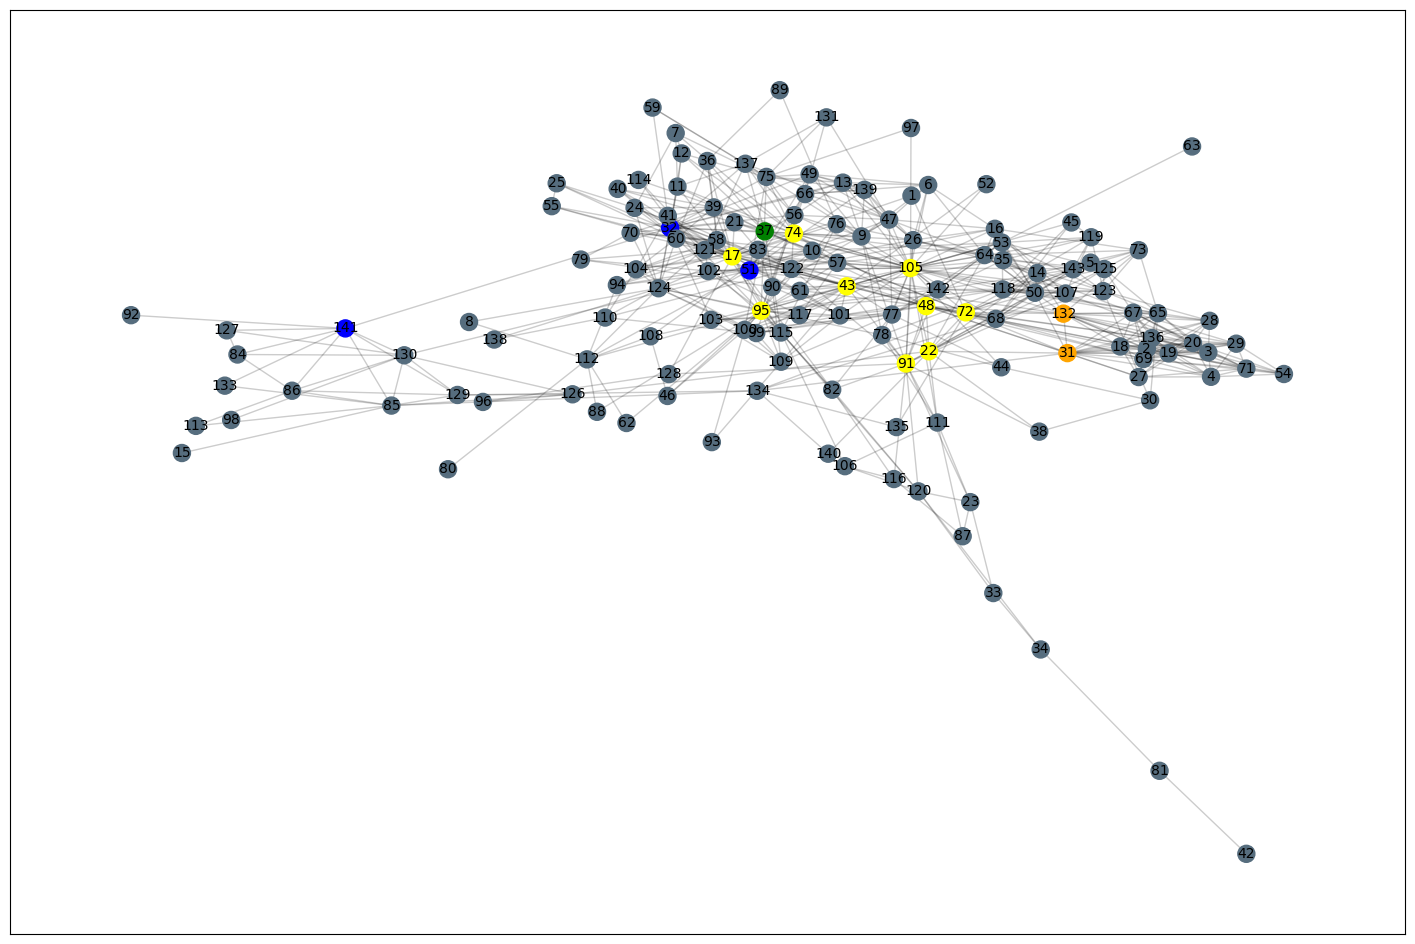

In [250]:
# Draw network
plt.figure(figsize=(18,12))
pos = nx.spring_layout(G_color)
nx.draw_networkx_nodes(G_color, pos, node_size=150, node_color=color_dept)
nx.draw_networkx_edges(G_color, pos, alpha=0.2)
nx.draw_networkx_labels(G_color, pos, font_size=10, font_family='sans-serif')

**Los color amarillo son aquellos que aparecen en cercanía de grado, intermediación y cercanía.**

**Los color naranja son los que aparecen únicamente en la cercanía de grado.**

**Los color azul son los que aparecen únicamente en la cercanía de intermediación.**

**Los color verde son los que aparecen únicamente en la cercanía de cercanía.**

## **Red dirigida**

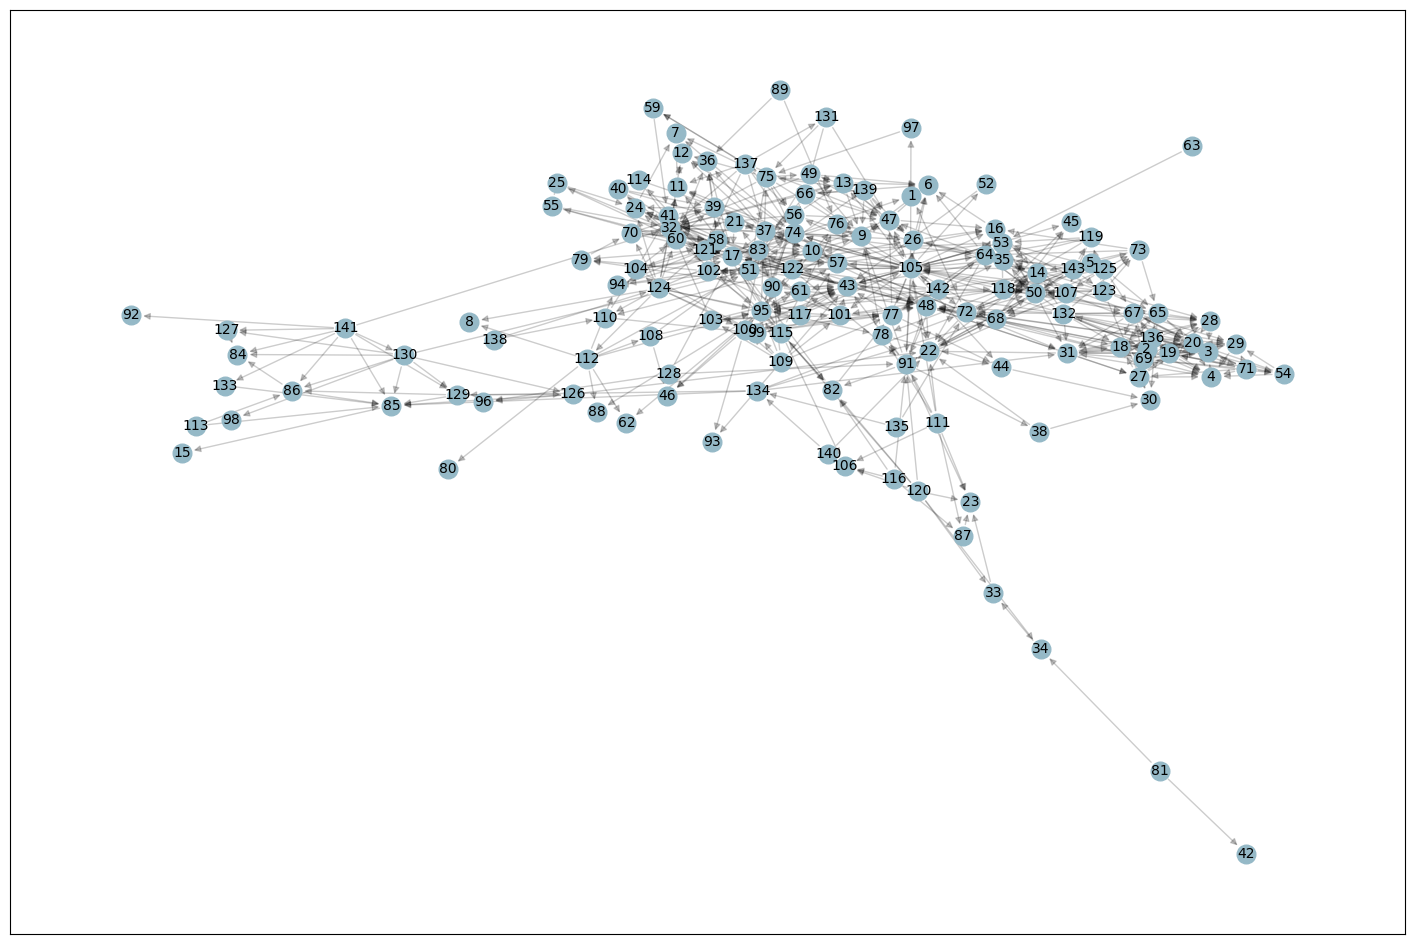

In [251]:
# Read edge list
G_dirigida = nx.from_pandas_edgelist(df_red, source='Emisor', target='Receptor', create_using=nx.DiGraph())

# Draw network
plt.figure(figsize=(18,12))
nx.draw_networkx_nodes(G_dirigida, pos, node_size=180, node_color= "#95B9C7")
nx.draw_networkx_labels(G_dirigida, pos, font_size=10, font_family='sans-serif')
nx.draw_networkx_edges(G_dirigida, pos, alpha=0.2)

In [252]:
#Calculo del PageRank de los nodos
pr = nx.pagerank(G_dirigida)
pr_5 = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:5]
pr_5

[(17, 0.04868015174807312),
 (6, 0.033312856903145185),
 (7, 0.03256841781764689),
 (2, 0.028037586973468913),
 (10, 0.02572760354369403)]

## **Conclusiones**

**Total de empleados, total de interacciones por correo electrónico.**

In [253]:
#Total de nodos en la red
total_nodos = G_dirigida.number_of_nodes()

#Total de interacciones en la red
total_aristas = G_dirigida.number_of_edges()

print(f"Total de empleados: {total_nodos}")
print(f"Total de interacciones por correo electrónico: {total_aristas}")

Total de empleados: 143
Total de interacciones por correo electrónico: 623


**Quién tiene el máximo grado, quien el mínimo, y que significa.**

El grado significa el numero de arcos que tiene el nodo.

In [254]:
#Nodo con grado maximo
nodo_grado_max = max(dict(G_dirigida.degree()).items(), key=lambda x: x[1])

#Nodo con grado minimo
nodo_grado_min = min(dict(G_dirigida.degree()).items(), key=lambda x: x[1])

print(f"Nodo con grado maximo: {nodo_grado_max}")
print(f"Nodo con grado minimo: {nodo_grado_min}")

Nodo con grado maximo: (105, 42)
Nodo con grado minimo: (15, 1)


**Cuál es el diámetro de la red y que significa.**

El diámetro de una red es la distancia máxima de la misma.

In [255]:
#Diametro de la red
diametro = nx.diameter(G)

print(f"Diametro de la red: {diametro}")

Diametro de la red: 8


**Cuál es el promedio de los caminos más corto y que significa.**

define el número medio de pasos que hay que recorrer a través del camino más corto para todos los posibles pares de nodos de una red.

In [256]:
#El promedio del camino más corto de la red
promedio_caminos = nx.average_shortest_path_length(G)

print(f"Promedio de los caminos mas cortos de la red: {promedio_caminos}")

Promedio de los caminos mas cortos de la red: 2.967004826159756


**¿La red es robusta? ¿Cómo reacciona el sistema antes fallas o ataques?**

In [257]:
#Densidad de la red
nx.density(G)

0.061361174037230376

De acuerdo a la densidad de la red podemos ver que no es tan resistente a fallas o ataques.

**Tomando en cuenta las tres medidas de centralidad, ¿cuáles son los nodos más importantes?**

De acuerdo a la información de la red los siguientes nodos aparecen en las tres medidas de centralidad.

In [258]:
repetidos

[72, 105, 74, 43, 48, 17, 22, 91, 95]

**Según el PageRank, ¿quién es el nodo más importante? Y en base a que es su
importancia.**

Su importancia se basa en la clasificación de los nodos de la red y su importancia se basa en la estructura de los enlaces entrantes de los nodos.

In [259]:
#Nodo más importante del page rank
print(f"Nodo más importante del page rank con su importancia: {pr_5[0]}")


Nodo más importante del page rank con su importancia: (17, 0.04868015174807312)
